# Long Short-Term Memory (LSTM)

In [1]:
import random
import math
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:-.3e}".format})
np.random.seed(0)
import importlib

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 4)

import torch
torch.manual_seed(0)

import torch.nn as nn
from torch.autograd import Variable

from core import _


In [2]:
_('''
### My readings:

* [Long Short-Term Memory (LSTM), Clearly Explained](https://www.youtube.com/watch?v=YCzL96nL7j0&list=PLblh5JKOoLUIcdlgu78MnlATeyx4cEVeR&index=151)
* [How to apply LSTM using PyTorch](https://cnvrg.io/pytorch-lstm/)
* [LSTM documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)
''')


### My readings:

* [Long Short-Term Memory (LSTM), Clearly Explained](https://<br>www.youtube.com/watch?v=YCzL96nL7j0&list=PLblh5JKOoLUIcdlgu78MnlATeyx4cEVeR&inde<br>x=151)
* [How to apply LSTM using PyTorch](https://cnvrg.io/pytorch-lstm/)
*<br>[LSTM<br>documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html)<br>

In [4]:
import nn_tools.data_sources as ds
_ = importlib.reload(ds)

import nn_tools.data_sequencer as cs
_ = importlib.reload(cs)
from nn_tools.data_sequencer import ContextSequencer

from nn_tools.data_sources import SinusDs
from models.lstm_model import Model, NnDriver

In [ ]:
verbose = False
training_end_index = 4000
data = SinusDs.Sinus(noise=0.03)
training_data = data[:training_end_index]

ds = SinusDs(
        training_data, 
        (None, None),
        step=3,
        noise=0.03
        )

dr = NnDriver(
    data_source=ds,
    model_class=Model,
    future_count=15,
    verbose=verbose
    )

dr.train(data_count=500, 
         end_index=len(training_data) - dr.future_count, 
         verbose=verbose)


TRAINING DATA
begin index: 3495, 
end index: 3984, 
data count: 500
sequence length: 10

Epoch [10/1000], Loss: 2.8e-01,  Diff: 3.0e-02
Epoch [20/1000], Loss: 1.6e-01,  Diff: 9.1e-02
Epoch [30/1000], Loss: 7.2e-02,  Diff: -1.4e-01
Epoch [40/1000], Loss: 5.4e-02,  Diff: -3.3e-03
Epoch [50/1000], Loss: 5.0e-02,  Diff: 3.5e-02
Epoch [60/1000], Loss: 4.5e-02,  Diff: 1.5e-02
Epoch [70/1000], Loss: 4.1e-02,  Diff: 5.3e-03
Epoch [80/1000], Loss: 3.9e-02,  Diff: 2.3e-03
Epoch [90/1000], Loss: 3.8e-02,  Diff: 1.7e-03
Epoch [100/1000], Loss: 3.7e-02,  Diff: 1.9e-03
Epoch [110/1000], Loss: 3.7e-02,  Diff: 2.1e-03
Epoch [120/1000], Loss: 3.6e-02,  Diff: 2.4e-03
Epoch [130/1000], Loss: 3.5e-02,  Diff: 2.9e-03
Epoch [140/1000], Loss: 3.4e-02,  Diff: 3.8e-03
Epoch [150/1000], Loss: 3.2e-02,  Diff: 5.3e-03
Epoch [160/1000], Loss: 3.0e-02,  Diff: 7.7e-03
Epoch [170/1000], Loss: 2.7e-02,  Diff: 1.2e-02
Epoch [180/1000], Loss: 2.3e-02,  Diff: 2.0e-02
Epoch [190/1000], Loss: 1.8e-02,  Diff: 3.5e-02
Epoch

In [8]:
shift = 50

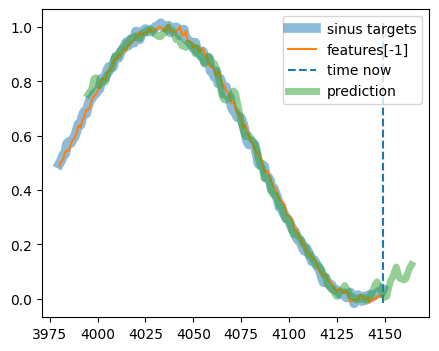

In [11]:
testing_end_index = training_end_index + shift
shift += 50
testing_data = data[:testing_end_index] 

dr.context_seq.data_source.data = testing_data
dr.show_action(
    end_index=testing_end_index,
    data_count=150,
    future_data=dr.context_seq.data_source.future_data(
                        data, 
                        testing_end_index-1, 
                        length=50),
    )